In [65]:
import sys
assert sys.version_info >= (3, 5)
import csv
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [66]:
val = int(input("Which file do you want classified? 1 for Q3, 2 for Q5.1, 3 for Q5.2 and 4 for Q5.3: "))
image_data = ""

if val == 1:
    image_data = "x_train_gr_smpl_random_reduced.csv"
    
elif val == 2:
    image_data = "train_sampl_1.csv"
    
elif val == 3:
    image_data = "train_sampl_2.csv"
elif  val == 4:
    image_data = "train_sampl_3.csv"
    
print(val)
print(image_data)

label_data = "y_train_smpl_random.csv"

#reads the data from the files
x_data = pd.read_csv(image_data)
y_data = pd.read_csv(label_data)

df1 = pd.DataFrame(x_data)
df2 = pd.DataFrame(y_data)
#turns the dataframes to numpy arrays
X= df1.values
#ravel flattens the labels array into a one dimensional array
Y= df2.values.ravel()

Which file do you want classified? 1 for Q3, 2 for Q5.1, 3 for Q5.2 and 4 for Q5.3: 3
3
train_sampl_2.csv


In [67]:
# Preprocessing to check if the datatypes and arrays are ready to use
print(X.dtype, Y.dtype)
print(X.shape, Y.shape)

int64 int64
(9689, 10) (9689,)


In [68]:
# Trains the model for 70% of the images array and 30% of the labels
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, Y)

In [69]:
train_X.shape, test_X.shape

((7266, 10), (2423, 10))

In [70]:
#Using the multinomial baive bayes algorithm as it is suitable for classification with discrete features i.e. the pixels that make up the images
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
clas = MultinomialNB()
clas.fit(train_X, train_Y)

MultinomialNB()

In [71]:
#Returns the accuracy on the given test data and labels.
clas.score(test_X, test_Y)

0.19892695006190672

In [72]:
from sklearn.metrics import classification_report
predictions = clas.predict(test_X)

#Test used in Q5 to check if every label has been predicted
labels1 = set(test_Y) - set(predictions)

for i in labels1:
    print(i)
    
print(classification_report(test_Y, predictions, labels=np.unique(predictions)))

              precision    recall  f1-score   support

           0       0.01      0.02      0.01        43
           1       0.24      0.23      0.24       542
           2       0.23      0.40      0.29       568
           3       0.13      0.03      0.05       357
           4       0.20      0.22      0.21       488
           5       0.00      0.00      0.00        57
           6       0.05      0.03      0.04        88
           7       0.08      0.05      0.06        63
           8       0.00      0.00      0.00       154
           9       0.00      0.00      0.00        63

    accuracy                           0.20      2423
   macro avg       0.09      0.10      0.09      2423
weighted avg       0.17      0.20      0.17      2423



In [59]:
def plot_images(images, labels):
    n_cols = min(5, len(images))
    n_rows = len(images) //n_cols
    fig = plt.figure(figsize=(8, 8))
    
    for i in range(n_rows * n_cols):
        sp = fig.add_subplot(n_rows, n_cols, i+1)
        plt.axis("off")
        plt.imshow(images[i], cmap=plt.cm.gray)
        sp.set_title(labels[i])
plt.show()

IndexError: index 20 is out of bounds for axis 0 with size 20

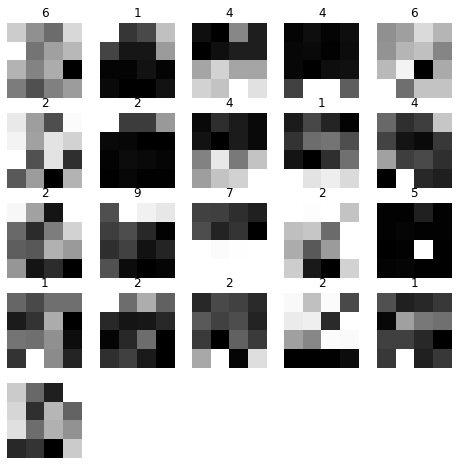

In [60]:
p = np.random.permutation(len(test_X))
p = p[:20]

dataset = image_data
if dataset == 'x_train_gr_smpl_random_reduced.csv':
    plot_images(test_X[p].reshape(-1, 35, 35), predictions[p])

elif dataset == 'train_sampl_1.csv':
    plot_images(test_X[p].reshape(-1, 2, 2), predictions[p])

elif dataset == 'train_sampl_2.csv':
    plot_images(test_X[p].reshape(-1, 5, 5), predictions[p])

elif  dataset == 'train_sampl_3.csv':
    plot_images(test_X[p].reshape(-1, 4, 4), predictions[p])

In [61]:
ycount = np.ones((10))

In [62]:
#Calculates the probablities of each class
for x, y in zip(X, Y):
    y1 = int(y)
    ycount[y1] += 1
        
py = (ycount/ ycount.sum()) * 100

print('Probablities', py)

Probablities [ 2.17 22.9  23.21 14.55 20.42  2.18  3.72  2.48  5.58  2.79]


In [63]:
classifier = clas

Confusion matrix, without normalization
[[  0   6  16   2  13   0   5   2   2   2]
 [  2  60 166  21 147   9  45  21  19  60]
 [  3  68 149  18 171   9  32  21  25  69]
 [  0  32  93  10 114   6  41   8  16  44]
 [  0  60 146  12 117   8  32  16  11  60]
 [  0   5  14   1  21   2   9   1   7   6]
 [  0  15  29   1  22   3   7   6   3   8]
 [  0   7  14   0  18   2   3   2   5   9]
 [  0  20  40   3  46   1  15   7   5  16]
 [  0   7  17   2  13   0   5   3   4  10]]
Normalized confusion matrix
[[0.   0.12 0.33 0.04 0.27 0.   0.1  0.04 0.04 0.04]
 [0.   0.11 0.3  0.04 0.27 0.02 0.08 0.04 0.03 0.11]
 [0.01 0.12 0.26 0.03 0.3  0.02 0.06 0.04 0.04 0.12]
 [0.   0.09 0.26 0.03 0.31 0.02 0.11 0.02 0.04 0.12]
 [0.   0.13 0.32 0.03 0.25 0.02 0.07 0.03 0.02 0.13]
 [0.   0.08 0.21 0.02 0.32 0.03 0.14 0.02 0.11 0.09]
 [0.   0.16 0.31 0.01 0.23 0.03 0.07 0.06 0.03 0.09]
 [0.   0.12 0.23 0.   0.3  0.03 0.05 0.03 0.08 0.15]
 [0.   0.13 0.26 0.02 0.3  0.01 0.1  0.05 0.03 0.1 ]
 [0.   0.11 0.28 0.03 0.

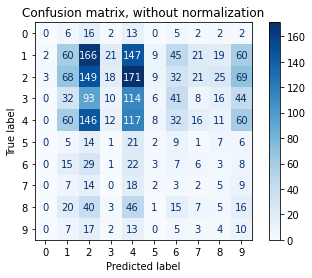

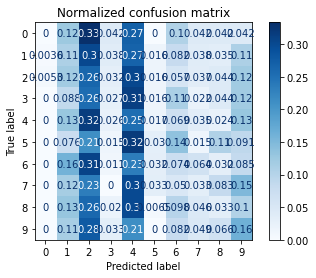

In [64]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
#Equivalent of using .target_name as numpy arrays dont have a target names method
labels=np.unique(predictions)

for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, test_X, test_Y,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()